# dexined

# import

In [1]:
import numpy as np, cv2
import matplotlib.pylab as plt
import os
import cv2
import kornia


!git clone https://github.com/xavysp/DexiNed.git

!cd DexiNed

# Folder 

In [83]:
img_dir = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\ori' 


output_folder = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\CLASSIC'  


# image processing

# 여러 전처리 중에 가장 선명한건 흑백변환-> 히스토그램 평탄화 -> 가우시안 블러 

## 가우시안 -> 흑백

`-` wear

```python
# Define the directory containing the images

counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    
    if ("ori_wear" in filename ) and (filename.endswith(".jpg") or filename.endswith(".png")):
        # Load the image in grayscale mode
        
        
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)

        # 가우시안 블러 적용
        blurred_img = cv2.GaussianBlur(img_gray, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"wear_ga_bg_{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), blurred_img)

        # Increment the counter
        counter += 1
```       
        

`-` nor


```python

counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    
    if ("ori_nor" in filename ) and (filename.endswith(".jpg") or filename.endswith(".png")):
        # Load the image in grayscale mode
        
        
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)

        # 가우시안 블러 적용
        blurred_img = cv2.GaussianBlur(img_gray, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"Nor_ga_bg__{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), blurred_img)

        # Increment the counter
        counter += 1
```

## 흑백변환 -> CLAHE -> 가우시안 블러

`-` wear

In [84]:



counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)

        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img_clahe = clahe.apply(img_gray)

        # Apply Gaussian blur
        img_gauss = cv2.GaussianBlur(img_clahe, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"wear_cl_ga_bg_{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), img_gauss)

        # Increment the counter
        counter += 1


`-` nor

In [85]:

# Define the directory containing the images

counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    
    if ("ori_nor" in filename ) and (filename.endswith(".jpg") or filename.endswith(".png")):
        # Load the image in grayscale mode
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)

        # Apply CLAHE
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img_clahe = clahe.apply(img_gray)

        # Apply Gaussian blur
        img_gauss = cv2.GaussianBlur(img_clahe, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"Nor_cl_ga_bg_{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), img_gauss)

        # Increment the counter
        counter += 1


## 히스토그램 스트레칭

`-` wear


```python
counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    # Only process the images with 'ori' in the filename
    if ("ori_wear" in filename) and (filename.endswith(".jpg") or filename.endswith(".png")):
        # Load the image in grayscale mode
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)
        
        print(filename)

        # Apply histogram stretching
        minval = np.min(img_gray)
        maxval = np.max(img_gray)
        img_stretched = (img_gray - minval) / (maxval - minval) * 255
        img_stretched = img_stretched.astype(np.uint8)

        # Apply Gaussian blur
        img_gauss = cv2.GaussianBlur(img_stretched, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"wear_hs_ga_bg_{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), img_gauss)

        # Increment the counter
        counter += 1

```

`-` Nor

```python
counter = 0

# Iterate over all images in the directory
for filename in os.listdir(img_dir):
    # Only process the images with 'ori' in the filename
    if ("ori_nor" in filename) and (filename.endswith(".jpg") or filename.endswith(".png")):
        # Load the image in grayscale mode
        img_gray = cv2.imread(os.path.join(img_dir, filename), cv2.IMREAD_GRAYSCALE)
        
        print(filename)

        # Apply histogram stretching
        minval = np.min(img_gray)
        maxval = np.max(img_gray)
        img_stretched = (img_gray - minval) / (maxval - minval) * 255
        img_stretched = img_stretched.astype(np.uint8)

        # Apply Gaussian blur
        img_gauss = cv2.GaussianBlur(img_stretched, (5, 5), 0)

        # Save the processed image with a new name in the same directory
        new_filename = f"Nor_hs_ga_bg_{counter}.jpg"
        cv2.imwrite(os.path.join(output_folder, new_filename), img_gauss)

        # Increment the counter
        counter += 1
```


# Run

In [86]:
os.chdir(r'C:\Users\31083\Desktop\DexiNed')

!python main.py

actual size: (443, 584, 3), target size: (512, 512)
Number of GPU's available: 1
Pytorch version: 2.0.1+cu118
mean_bgr: [103.939, 116.779, 123.68]
output_dir: result\BIPED2CLASSIC
Restoring weights from: checkpoints\BIPED\10/10_model.pth
input tensor shape: torch.Size([1, 3, 512, 512])
******** Testing finished in CLASSIC dataset. *****
FPS: 2.410655.4
-------------------------------------------------------
DexiNed # of Parameters:
35215245
-------------------------------------------------------


# 샤프닝

## 커널 2로 결정 -> 가시성이 제일좋음

In [88]:
# Define the directory containing the images
# folder_path = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\DexiNed_code\result\BIPED2CLASSIC\avg'
# output_folder = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\dexi_result'


folder_path = r'C:\Users\31083\Desktop\DexiNed\result\BIPED2CLASSIC\avg'
output_folder = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\dexi_result'

```python

kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        img = cv2.imread(os.path.join(folder_path, filename))

        # Apply the sharpening
        img_sharp = cv2.filter2D(img, -1, kernel)

        # Save the processed image with a new name in the same directory
        base_filename, _ = os.path.splitext(filename)  # Extract the base filename without the extension
        new_filename = f"{base_filename}_sharp.jpg"  # Append '_sharp' to the base filename
        cv2.imwrite(os.path.join(output_folder, new_filename), img_sharp)
```

        
        

In [89]:
kernel2 = np.array([[-1, -1, -1],
                   [-1, 9, -1],
                   [-1, -1, -1]])


# Iterate over all images in the directory
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Load the image
        img = cv2.imread(os.path.join(folder_path, filename))

        # Apply the sharpening
        img_sharp = cv2.filter2D(img, -1, kernel2)

        # Save the processed image with a new name in the same directory
        base_filename, _ = os.path.splitext(filename)  # Extract the base filename without the extension
        new_filename = f"{base_filename}_sharp_kernel2.jpg"  # Append '_sharp' to the base filename
        cv2.imwrite(os.path.join(output_folder, new_filename), img_sharp)


```python
kernel3 = np.array([[-1, -1, -1],
                   [-1, 9.1,-1],
                   [-1, -1, -1]])




for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        
        img = cv2.imread(os.path.join(folder_path, filename))


        img_sharp = cv2.filter2D(img, -1, kernel3)

        base_filename, _ = os.path.splitext(filename)  # Extract the base filename without the extension
        new_filename = f"{base_filename}_sharp_kernel3.jpg"  # Append '_sharp' to the base filename
        cv2.imwrite(os.path.join(output_folder, new_filename), img_sharp)
```

## 시각화

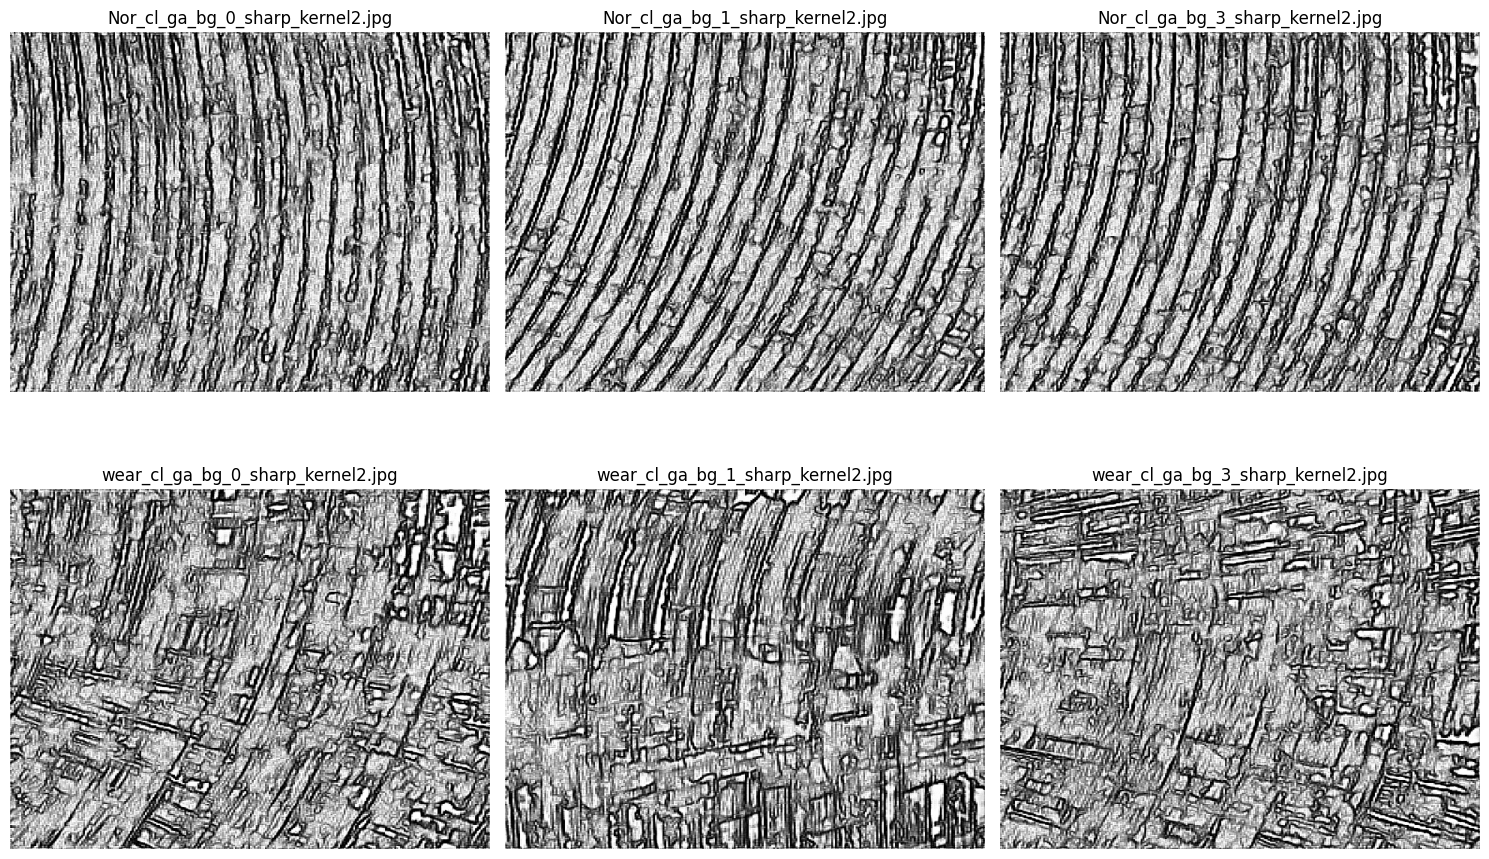

In [90]:


# 이미지가 있는 로컬 경로를 지정합니다. (예시로 폴더 경로를 'images'라고 가정합니다.)
folder_path = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\dexi_result'

# 원하는 이미지 파일들의 이름을 리스트에 추가합니다.
selected_images = [ 'Nor_cl_ga_bg_0_sharp_kernel2.jpg','Nor_cl_ga_bg_1_sharp_kernel2.jpg','Nor_cl_ga_bg_3_sharp_kernel2.jpg',
                   'wear_cl_ga_bg_0_sharp_kernel2.jpg','wear_cl_ga_bg_1_sharp_kernel2.jpg','wear_cl_ga_bg_3_sharp_kernel2.jpg']

# Create a 2x3 grid to plot the images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 선택한 이미지 파일들을 순회하며 하나씩 로드하고 시각화합니다.
for i, image_file in enumerate(selected_images):
    image_path = os.path.join(folder_path, image_file)
    
    # 이미지를 로드합니다.
    image = cv2.imread(image_path)
    
    # 이미지를 시각화합니다.
    ax = axes[i//3, i%3]  # Determine the row and column indices for the subplot
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(image_file)  # 이미지 파일 이름을 제목으로 표시합니다.
    ax.axis('off')  # 축을 제거하여 이미지 위에 좌표를 표시하지 않습니다.

plt.tight_layout()
plt.show()


# 분류기

In [2]:
import torch
import torchvision
# from fastai.vision.all import * 
import time
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }');
import cv2
import numpy as np, cv2
import matplotlib.pylab as plt
import os
import cv2

from PIL import Image
import os

import numpy as np, cv2
# import matplotlib.pylab as plt
import os
import cv2

from fastai.vision.all import * 
from fastai.metrics import *

import os

from fastai.callback.tracker import EarlyStoppingCallback

from fastai.vision.all import get_image_files, PILImage


## 데이터로더 생성

In [3]:
path = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\dexi_result'


# path = '/content/drive/MyDrive/cnn_cnc/all_blur'
files= get_image_files(path)

#라벨링 함수
def label_func(fname):
    
      if fname[0].isupper():
        return 'Nor'
    
      else:
        return 'Wear'

dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224), batch_size=16)

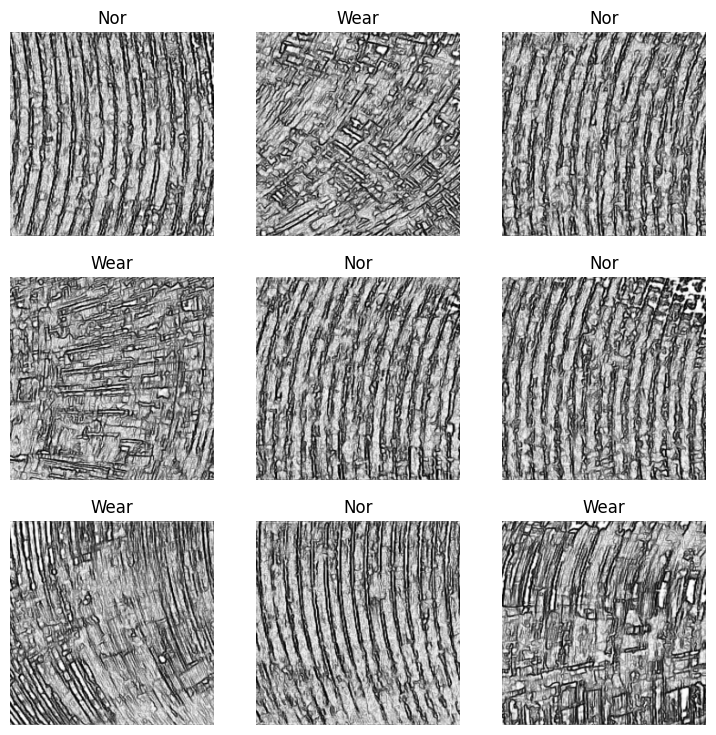

In [4]:
  # 학습 데이터셋에 대한 데이터 로더
dls.show_batch() # 첫 번째 배치의 이미지 시각화

## train

In [61]:
lrnr = cnn_learner(dls, resnet34, metrics=accuracy)

Better model found at epoch 0 with valid_loss value: 0.8513227701187134.


Better model found at epoch 0 with valid_loss value: 0.7603328824043274.
Better model found at epoch 1 with valid_loss value: 0.6849238276481628.
Better model found at epoch 2 with valid_loss value: 0.6764587163925171.
Better model found at epoch 6 with valid_loss value: 0.42987769842147827.
Better model found at epoch 11 with valid_loss value: 0.2016381174325943.
Better model found at epoch 12 with valid_loss value: 0.13928812742233276.
Better model found at epoch 13 with valid_loss value: 0.08668418973684311.
No improvement since epoch 13: early stopping


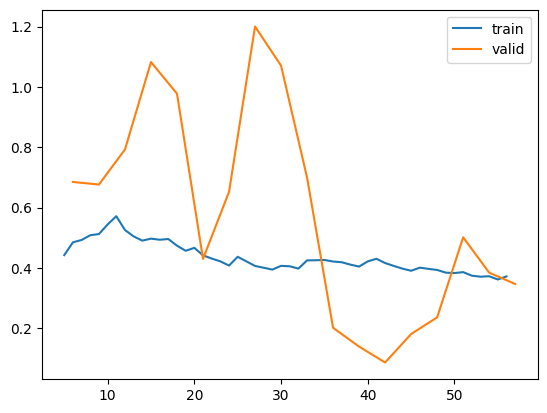

In [71]:

# 저장할 모델 경로 설정


lrnr = cnn_learner(dls, resnet152, metrics=accuracy)

# EarlyStopping and SaveModel 콜백 함수 정의
early_stopping_cb = EarlyStoppingCallback(monitor='valid_loss', patience=5)
save_model_cb = SaveModelCallback(monitor='valid_loss', fname= r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\CF_best_model')

# fine-tuning 수행
lrnr.fine_tune(30, cbs=[early_stopping_cb, save_model_cb])

# 로스값 시각화
lrnr.recorder.plot_loss()


In [74]:
cf_model = lrnr.load(r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Code\CF_best_model')




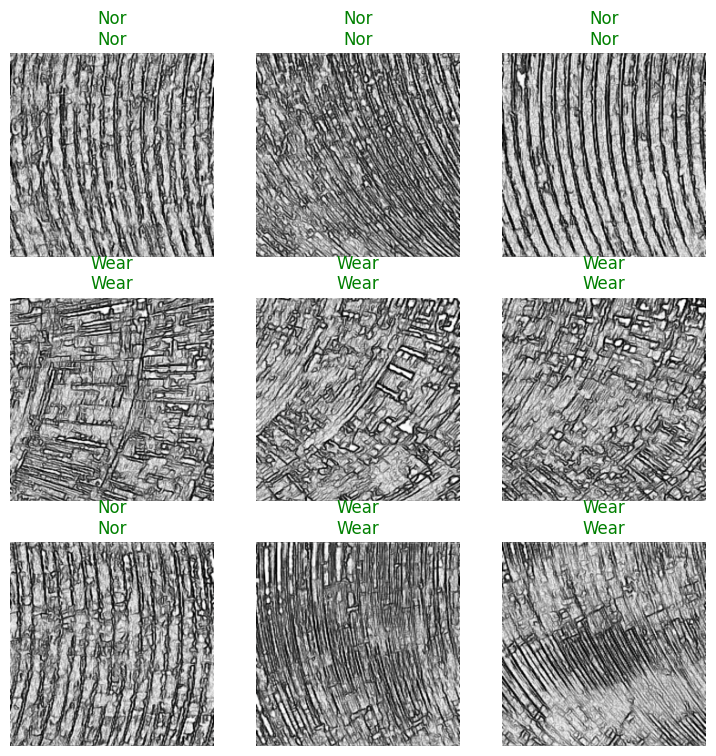

In [75]:
cf_model.show_results()

## Test

In [47]:
img_dir = r'C:\Users\31083\Documents\GitHub\Project\CNC_YOLOV8_Segmodel\Image\surface_test' 
test_files= get_image_files(img_dir)

Image file name: Nor_cl_ga_bg_26_sharp_kernel2.jpg


('Nor', tensor(0), tensor([9.9977e-01, 2.3409e-04]))


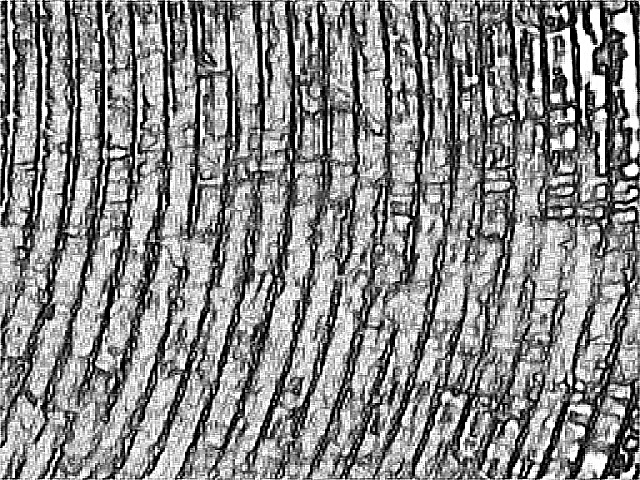

In [84]:

image_path = test_files[0]
file_name = os.path.basename(image_path)
print("Image file name:", file_name)

print(cf_model.predict(PILImage.create(image_path)))
PILImage.create(image_path)

Image file name: wear_cl_ga_bg_39_sharp_kernel2.jpg


('Wear', tensor(1), tensor([0.0042, 0.9958]))


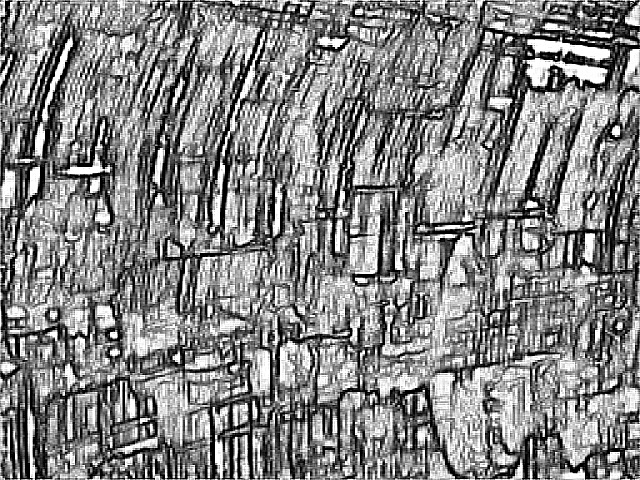

In [83]:
image_path = test_files[4]
file_name = os.path.basename(image_path)
print("Image file name:", file_name)

print(cf_model.predict(PILImage.create(image_path)))
PILImage.create(image_path)

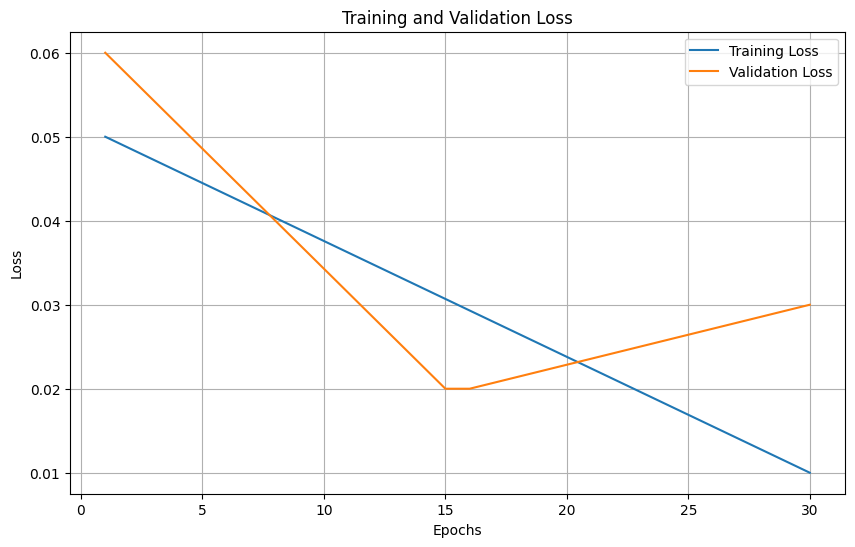

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of 30 values between 0 and 1 for training loss
train_loss = np.linspace(0.05, 0.01, 30)

# Generate validation loss values that first decrease (improving) then start to increase (overfitting)
valid_loss = np.concatenate([np.linspace(0.06, 0.02, 15), np.linspace(0.02, 0.03, 15)])

# Generate x values (epochs)
epochs = range(1, 31)

plt.figure(figsize=(10,6))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, valid_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()